In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t, linregress
from sklearn.linear_model import LinearRegression

1. Import the data from the file “invest.txt” and print them in a readable form, e.g. a table containing
first 5 observations.

In [22]:
# Read the data from the file
df = pd.read_csv("invest.txt", sep=" ")

print(df.head())


   year     gnp  invest     cpi  interest
0  1968   873.4   133.3   82.54      5.16
1  1969   944.0   149.3   86.79      5.87
2  1970   992.7   144.2   91.45      5.95
3  1971  1077.6   166.4   96.01      4.88
4  1972  1185.9   195.0  100.00      4.50


2) Plot the data with Gross National Product (GNP, column “gnp”) being the abscissa and Investment
(column “invest”) being the ordinate.

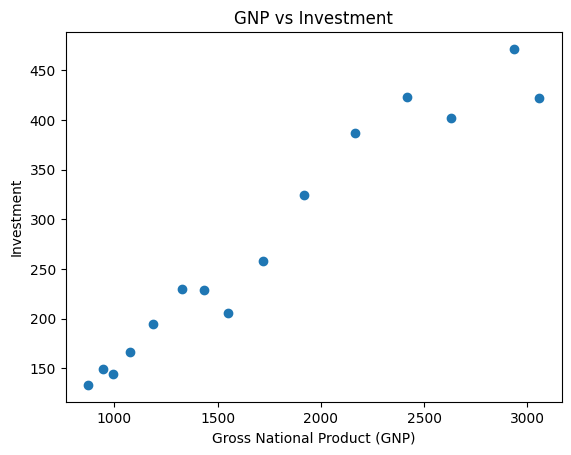

In [23]:
plt.scatter(df['gnp'], df['invest'])
plt.xlabel('Gross National Product (GNP)')
plt.ylabel('Investment')
plt.title('GNP vs Investment')
plt.show()


In [24]:
df['gnp'] = np.log(df['gnp'])
df['invest'] = np.log(df['invest'])

3) For the linear regression of Investment on GNP, estimate the intercept and the slope and their
standard deviations, as well as the determination coefficient for the ordinary least squares. Output
them in a readable form.

In [25]:
# Calculate the mean of x and y
mean_x = sum(df['gnp']) / len(df['gnp'])
mean_y = sum(df['invest']) / len(df['invest'])

# Calculate the slope
slope = sum((df['gnp'] - mean_x) * (df['invest'] - mean_y)) / sum((df['gnp'] - mean_x) ** 2)

# Calculate the intercept
intercept = mean_y - slope * mean_x

# Calculate the standard deviation
std_dev = (sum((df['invest'] - (slope * df['gnp'] + intercept)) ** 2) / (len(df['invest']) - 2)) ** 0.5

# Calculate the determination coefficient (R-squared)
ss_total = sum((df['invest'] - mean_y) ** 2)
ss_residual = sum((df['invest'] - (slope * df['gnp'] + intercept)) ** 2)
determination_coefficient = 1 - (ss_residual / ss_total)

# Print the results
print(f"Intercept: {intercept:.2f}")
print(f"Slope: {slope:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Determination Coefficient (R-squared): {determination_coefficient:.2f}")


Intercept: -1.96
Slope: 1.02
Standard Deviation: 0.09
Determination Coefficient (R-squared): 0.96


4) Test the signiﬁcance of the slope using the Student-t test. Report the value of the test statistic and
the p-value.

In [26]:
beta1 = 1

n = len(df['gnp'])

sigma2_est = np.sum((df['invest'] - (slope * df['gnp'] + intercept))**2) / (n-2)
var1_est = sigma2_est / np.sum((df['gnp'] - np.mean(df['gnp']))**2)

print(f"p-value: {2*t.cdf(-np.abs((slope-beta1)/np.sqrt(var1_est)), n)}")

p-value: 0.7863731377761369


4. For the GNP value 1000, estimate the necessary Investment, provide confidence and prediction
intervals for the 90% level.

In [33]:
GNP_est = np.log(1000)
alpha = 0.10

invest_est = slope * GNP_est + intercept

def CI(x):
    return t.ppf(1-alpha/2, n-2)*np.sqrt(sigma2_est)*np.sqrt(1/n + (x-np.mean(df['gnp']))**2/np.sum((df['gnp'] - np.mean(df['gnp']))**2))

M = CI(GNP_est)

print(f"Predicted investment: {np.exp(invest_est)}")
print(f"Confidence interval: [{np.exp(invest_est-M)}, {np.exp(invest_est+M)}]")

Predicted investment: 155.97942793105466
Confidence interval: [146.67552673421926, 165.87349286827552]


6. On a plot with logarithmic axes (GNP as abscissa and Investment as ordinate), plot the data, the
estimated regression line, the confidence and prediction intervals for all values of log(GNP) between
its minimum and maximum in the data set.

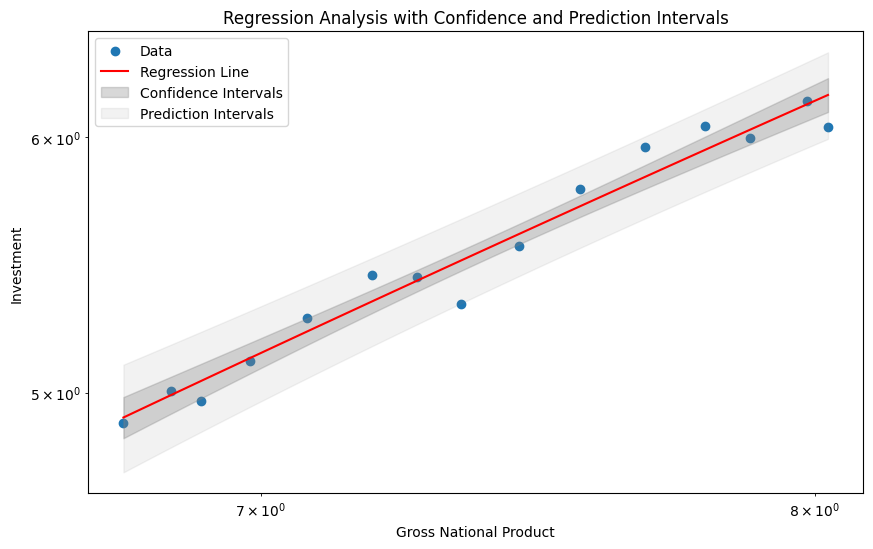

In [54]:
# Set up the plot with logarithmic axes
plt.figure(figsize=(10, 6))
plt.loglog()

# Plot the data points
plt.scatter(df['gnp'], df['invest'], label='Data')

# Plot the estimated regression line
x = np.linspace(min(df['gnp']), max(df['gnp']), 100)
y = slope * x + intercept
plt.plot(x, y, color='red', label='Regression Line')

# Plot the confidence intervals
CI_int = np.array([CI(kx) for kx in x])
lower_ci = y - CI_int
upper_ci = y + CI_int
plt.fill_between(x, lower_ci, upper_ci, color='gray', alpha=0.3, label='Confidence Intervals')

def PI(x):
    return t.ppf(1-alpha/2, n-2)*np.sqrt(sigma2_est)*(1 + 1/n + (x-np.mean(df['gnp']))**2/np.sum((df['gnp'] - np.mean(df['gnp']))**2))

# Plot the prediction intervals
PI_int = np.array([PI(kx) for kx in x])
lower_pi = y - PI_int
upper_pi = y + PI_int
plt.fill_between(x, lower_pi, upper_pi, color='gray', alpha=0.1, label='Prediction Intervals')

# Set the labels and title
plt.xlabel('Gross National Product')
plt.ylabel('Investment')
plt.title('Regression Analysis with Confidence and Prediction Intervals')

# Add a legend
plt.legend()

# Show the plot
plt.show()


7. Estimate the intercept, the slope, and the determination coefficient and predict the necessary Investment for the GNP value 1000 using existing functionality. The class LinearRegression() from sklearn.linear_model is suggested but not obligatory ; any other available implementation of the linear regression can be used instead. Report the estimated values and make sure that those calculated ‘by hand’ (Steps 3 and 5) coincide with the ones obtained using existing implementation

In [43]:
# Calculate the linear regression
slope_scipy, intercept_scipy, _, _, _ = linregress(df['gnp'], df['invest'])

print(f"Scipy intercept: {intercept_scipy:.2f}")
print(f"Scipy slope: {slope_scipy:.2f}")

Scipy intercept: -1.96
Scipy slope: 1.02


8. On a plot with logarithmic axes (GNP as abscissa and Investment as ordinate), plot the data, the regression line and the predicted point (in a different color). The graphic should coincide with the corresponding elements from the one in Step 6.

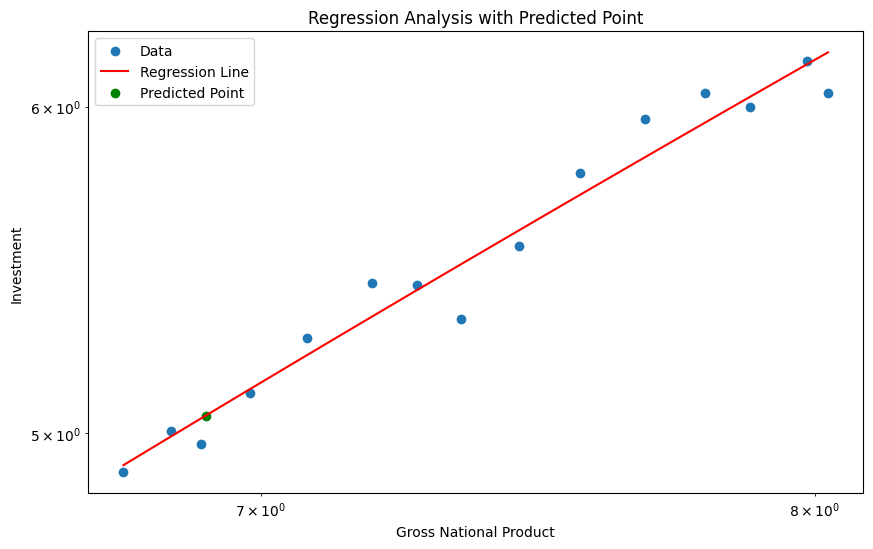

In [53]:
# Set up the plot with logarithmic axes
plt.figure(figsize=(10, 6))
plt.loglog()

# Plot the data points
plt.scatter(df['gnp'], df['invest'], label='Data')

# Plot the estimated regression line
x = np.linspace(min(df['gnp']), max(df['gnp']), 100)
y = slope * x + intercept
plt.plot(x, y, color='red', label='Regression Line')

# Plot the predicted point
GNP_est = np.log(1000)
invest_est = slope * GNP_est + intercept
plt.scatter(GNP_est, invest_est, color='green', label='Predicted Point')

# Set the labels and title
plt.xlabel('Gross National Product')
plt.ylabel('Investment')
plt.title('Regression Analysis with Predicted Point')

# Add a legend
plt.legend()

# Show the plot
plt.show()


9) For the linear regression of Investment on GNP and Interest, compute the associated Gram matrix. Is it of full rank ?

In [61]:
# Create a matrix X with GNP, Interest, and constant as columns
X = np.column_stack((df['gnp'], df['interest'], np.ones(len(df['gnp']))))

# Compute the Gram matrix
gram_matrix = np.dot(X.T, X)

# Print the Gram matrix
print(gram_matrix)
print(f"determinant: {np.linalg.det(gram_matrix)}")


[[820.24847688 839.18854302 110.75282116]
 [839.18854302 943.8557     111.79      ]
 [110.75282116 111.79        15.        ]]
determinant: 1306.2177680296743


10) For the linear regression of Investment on GNP and Interest, estimate the three regression coefficients and their standard deviations, as well as the determination coefficient for the ordinary least squares. Additionally, test significance of each coefficient using the Student-t test. Report the regression coefficients, corresponding to them p-values, and the determination coefficient in a readable form. Discuss significance of the estimated regression coefficients.

In [66]:
# Create a matrix X with GNP, Interest, and constant as columns
X = np.column_stack((df['gnp'], df['interest'], np.ones(len(df['gnp']))))

# Calculate the transpose of X
X_transpose = np.transpose(X)

# Calculate the product of X_transpose and X
X_transpose_X = X_transpose @ X

# Calculate the inverse of X_transpose_X
X_transpose_X_inverse = np.linalg.inv(X_transpose_X)

# Calculate the product of X_transpose and y
X_transpose_y = X_transpose @ df['invest']

# Calculate the regression coefficients
beta = X_transpose_X_inverse @ X_transpose_y

# Calculate the residuals
residuals = df['invest'] - X @ beta

# Calculate the sum of squared residuals
ssr = np.sum(residuals ** 2)

# Calculate the total sum of squares
sst = np.sum((df['invest'] - np.mean(df['invest'])) ** 2)

# Calculate the determination coefficient (R-squared)
determination_coefficient = 1 - (ssr / sst)

# Calculate the standard deviation of the residuals
residual_std_dev = np.sqrt(ssr / (len(df['invest']) - 3))

# Calculate the standard deviations of the regression coefficients
beta_std_dev = np.sqrt(np.diagonal(X_transpose_X_inverse) * residual_std_dev ** 2)

# Calculate the t-statistics for each coefficient
t_statistics = beta / beta_std_dev

# Calculate the p-values for each coefficient
p_values = 2 * t.cdf(-np.abs(t_statistics), len(df['invest']) - 3)

# Print the regression coefficients, their standard deviations, and p-values
print(f"Intercept: {beta[2]:.2f} (p-value: {p_values[2]:.2f})")
print(f"GNP Coefficient: {beta[0]:.2f} (p-value: {p_values[0]:.2f})")
print(f"Interest Coefficient: {beta[1]:.2f} (p-value: {p_values[1]:.2f})")
print(f"Determination Coefficient (R-squared): {determination_coefficient:.2f}")
print(f'Standard Deviation: {residual_std_dev:.2f}')


Intercept: -2.18 (p-value: 0.01)
GNP Coefficient: 1.05 (p-value: 0.00)
Interest Coefficient: -0.01 (p-value: 0.68)
Determination Coefficient (R-squared): 0.96
Standard Deviation: 0.09


11) For the values of GNP “ 1000 and Interest “ 10, predict the log(Investment) and provide confident and prediction intervals at the 99.9% level.

In [71]:
# Set the values of GNP and Interest
GNP = 1000
Interest = 10
alpha = 0.001

# Calculate the predicted log(Investment)
log_invest_est = beta[2] + beta[0] * np.log(GNP) + beta[1] * Interest

# Calculate the confidence interval
CI = t.ppf(1-alpha/2, len(df['invest']) - 3) * residual_std_dev * np.sqrt(1/len(df['invest']) + (np.log(GNP) - np.mean(df['gnp']))**2 / np.sum((df['gnp'] - np.mean(df['gnp']))**2))

# Calculate the prediction interval
PI = t.ppf(1-alpha/2, len(df['invest']) - 3) * residual_std_dev * np.sqrt(1 + 1/len(df['invest']) + (np.log(GNP) - np.mean(df['gnp']))**2 / np.sum((df['gnp'] - np.mean(df['gnp']))**2))

# Print the predicted log(Investment) and the confidence and prediction intervals
print(f"Predicted log(Investment): {log_invest_est:.2f}")
print(f"Confidence Interval: [{log_invest_est - CI:.2f}, {log_invest_est + CI:.2f}]")
print(f"Prediction Interval: [{log_invest_est - PI:.2f}, {log_invest_est + PI:.2f}]")


Predicted log(Investment): 5.02
Confidence Interval: [4.86, 5.17]
Prediction Interval: [4.60, 5.44]


12) On a same 3D-plot with axes being log(GNP), Interest, and log(Invetment), draw data points, their predictions, regression plane and surfaces of the 99.9% confidence intervals for each pair of value of log(GNP) and Interest between their minimum and maximum.


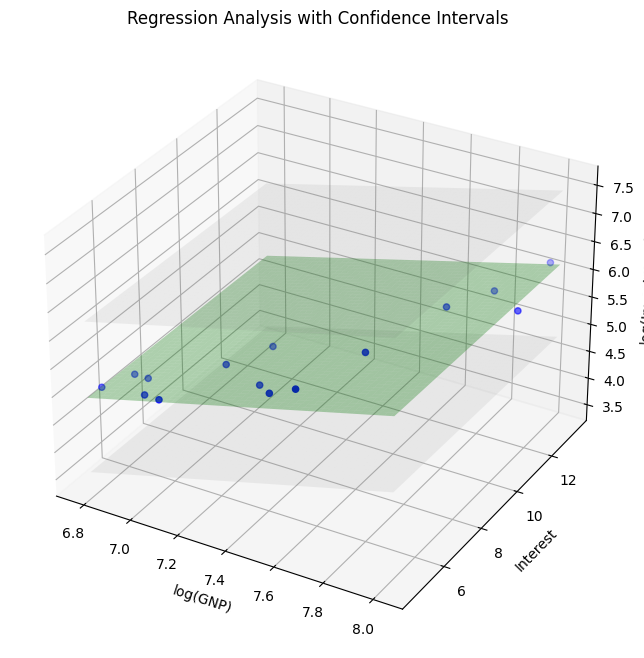

In [94]:
# Set up the figure and axes
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# Generate the grid of log(GNP) and Interest values
gnp_values = np.linspace(min(df['gnp']), max(df['gnp']), 100)
interest_values = np.linspace(min(df['interest']), max(df['interest']), 100)
gnp_grid, interest_grid = np.meshgrid(gnp_values, interest_values)

# Calculate the predicted log(Investment) for each grid point
log_invest_est = beta[2] + beta[0] * gnp_grid + beta[1] * interest_grid

# Plot the data points
ax.scatter(df['gnp'], df['interest'], df['invest'], color='blue', label='Data Points')

# Plot the regression plane
ax.plot_surface(gnp_grid, interest_grid, log_invest_est, alpha=0.3, color='green', label='Regression Plane')

# Calculate the confidence intervals for each grid point
CI = t.ppf(1 - alpha / 2, len(df['invest']) - 3) * residual_std_dev * np.sqrt(
    1 / len(df['invest']) + (np.log(gnp_grid) - np.mean(df['gnp'])) ** 2 / np.sum(
        (df['gnp'] - np.mean(df['gnp'])) ** 2))
lower_ci = log_invest_est - CI
upper_ci = log_invest_est + CI

# Plot the confidence intervals
ax.plot_surface(gnp_grid, interest_grid, lower_ci, alpha=0.1, color='gray', label='Confidence Intervals')
ax.plot_surface(gnp_grid, interest_grid, upper_ci, alpha=0.1, color='gray')

# Set the labels and title
ax.set_xlabel('log(GNP)')
ax.set_ylabel('Interest')
ax.set_zlabel('log(Investment)')
ax.set_title('Regression Analysis with Confidence Intervals')

# Show the plot
plt.show()


13) Estimate the regression and determination coefficients and predict the necessary log(Investment) for GNP=1000 and Interest=10 using existing functionality. Again, the class LinearRegression() from sklearn.linear_model is suggested but not obligatory ; any other available implementation of the linear regression can be used instead. Report the estimated values and make sure that those calculated ‘by hand’ (Steps 10 and 11) coincide with the ones obtained using existing implementation.

In [93]:
# Create an instance of the LinearRegression class
regression_model = LinearRegression()
X = df[['gnp', 'interest']]
y = df['invest']

# Fit the model to the data
regression_model.fit(X, y)

# Get the regression coefficients
coefficients = regression_model.coef_
intercept = regression_model.intercept_

# Calculate the determination coefficient (R-squared)
determination_coefficient = regression_model.score(df[['gnp', 'interest']], df['invest'])

# Predict the necessary Investment for GNP=1000 and Interest=10
gnp = 1000
interest = 10
investment_prediction = regression_model.predict([[np.log(gnp), interest]])

# Print the estimated values
print(f"Intercept: {intercept:.2f}")
print(f"GNP Coefficient: {coefficients[0]:.2f}")
print(f"Interest Coefficient: {coefficients[1]:.2f}")
print(f"Determination Coefficient (R-squared): {determination_coefficient:.2f}")
print(f"Predicted Investment for GNP=1000 and Interest=10: {investment_prediction[0]:.2f}")


Intercept: -2.18
GNP Coefficient: 1.05
Interest Coefficient: -0.01
Determination Coefficient (R-squared): 0.96
Predicted Investment for GNP=1000 and Interest=10: 5.02


c:\Users\Hippolyte\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
